In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

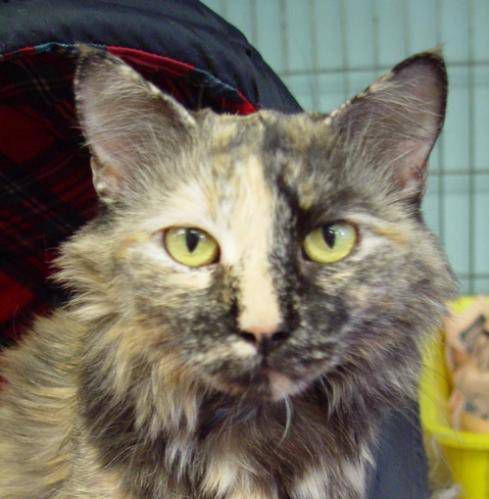

In [4]:
path = './cats_dogs_dataset/train/cats'
name = 'cat.10.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

# MODEL

In [39]:
base_model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1, 1),
    activation='relu'
    )

inputs =  keras.Input(shape=(150, 150, 3))
base = base_model(inputs)

vectors = keras.layers.MaxPooling2D(2,2)(base)

flatvectors = keras.layers.Flatten()(vectors)

inner = keras.layers.Dense(64, activation='relu')(flatvectors)

outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

model = keras.Model(inputs, outputs)

optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

**Q1. The best loss function for Binary Classification is _BinaryCrossentropy_**

In [40]:
model.count_params()

11215873

**Q2. The total number of parameters of the model = 11,215,873**

# Generators and Training

In [42]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './cats_dogs_dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


In [43]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './cats_dogs_dataset/validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 139s 1s/step - loss: 0.6946 - accuracy: 0.5575 - val_loss: 0.8488 - val_accuracy: 0.0630
Epoch 2/10
100/100 [==============================] - 120s 1s/step - loss: 0.6734 - accuracy: 0.5680 - val_loss: 0.6805 - val_accuracy: 0.5420
Epoch 3/10
100/100 [==============================] - 116s 1s/step - loss: 0.6650 - accuracy: 0.5985 - val_loss: 0.7290 - val_accuracy: 0.3980
Epoch 4/10
100/100 [==============================] - 97s 963ms/step - loss: 0.6620 - accuracy: 0.5965 - val_loss: 0.6723 - val_accuracy: 0.5580
Epoch 5/10
100/100 [==============================] - ETA: 0s - loss: 0.6475 - accuracy: 0.6110

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './cats_dogs_dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


In [ ]:
history = model.fit(train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)